# House Prices: Advanced Regression Techniques

The data for this project was obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

## Table of contents

1. [Introduction](#introduction)
2. [Exploratory Data Analysis](#eda)
<br>
3. [Data Preparation](#dpw) 
<br>    
4. [Model Fitting (Machine Learning)](#mfit)

## 1. Introduction & Basic Information <a name="introduction"></a>

This dataset consists of 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

Here's a brief description of the data fields:


* **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: $Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

This project performs extensive data preparation / feature engineering to get the most out of linear regression models (including Ridge Regression and the Lasso).

In [219]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [220]:
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [221]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As we can see, the training dataset has 1460 entries, there are some columns with missing values.

## 2. Exploratory Data Analysis <a name="eda"></a>

### SalePrice

Let’s start by analysing our response variable: “SalePrice”.

In [223]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

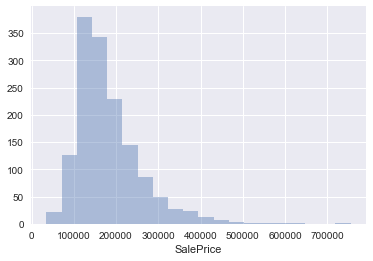

In [224]:
# Let’s take a look at the distribution of the response:
sns.distplot(train['SalePrice'], kde=False, bins=20);

Here we can see that SalePrice deviates from a normal distribution and has positive skewness.

In [225]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Let's continue by analysing the effect of some of our variables on our response.**

### GrLivArea & TotalBsmtSF

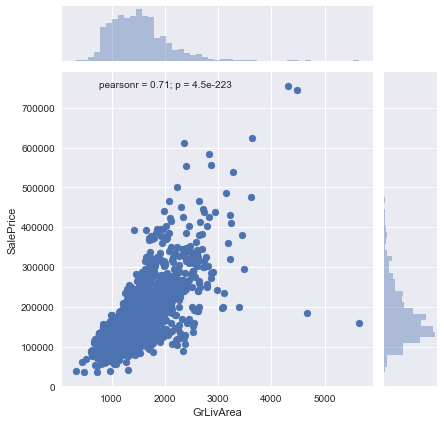

In [226]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=train);

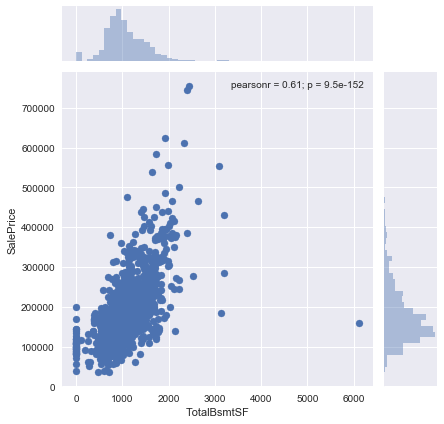

In [227]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=train);

'GrLivArea' and 'TotalBsmtSF' seem to be related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'GrLivArea' the relationship seems linear, and in the case of 'TotalBsmtSF' the relationship seems exponential or quadratic.

### OverallQual & YearBuilt

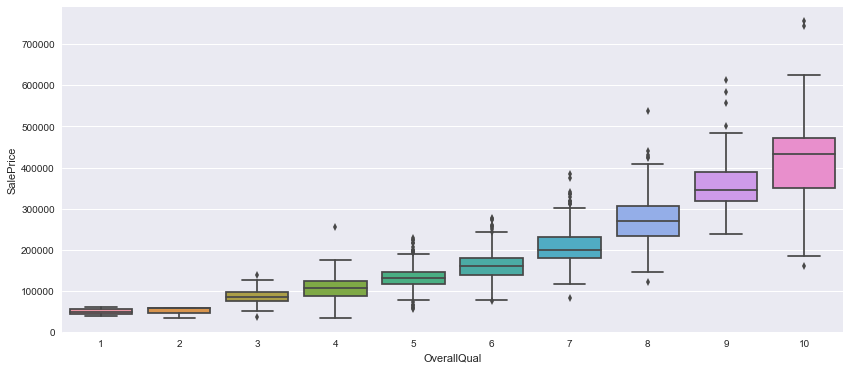

In [228]:
plt.figure(figsize=(14,6))
sns.boxplot("OverallQual", "SalePrice", data=train)

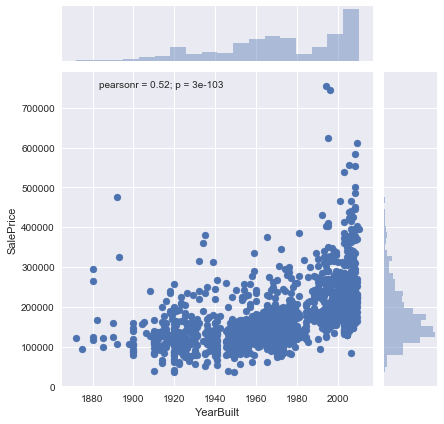

In [229]:
sns.jointplot(x='YearBuilt', y='SalePrice', data=train);

'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices clearly increase with the overall quality.

### Neighborhood

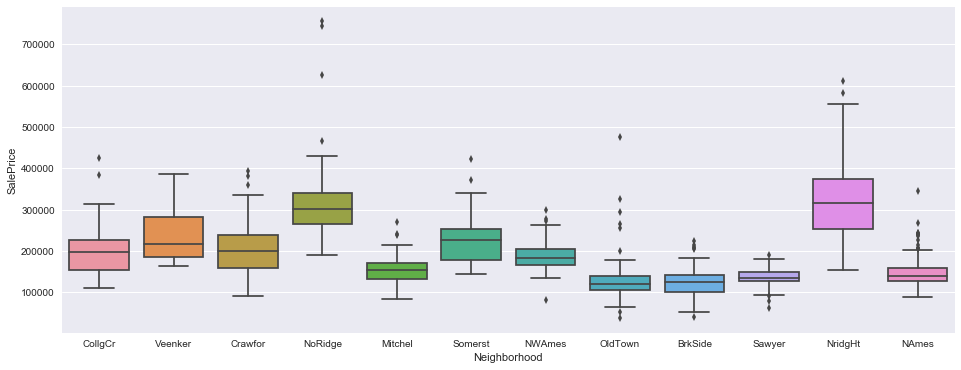

In [230]:
plt.figure(figsize=(16,6))
neigh1 = list(train["Neighborhood"].unique())[:12]
sns.boxplot("Neighborhood", "SalePrice", data=train[train["Neighborhood"].isin(neigh1)])

(0, 700000)

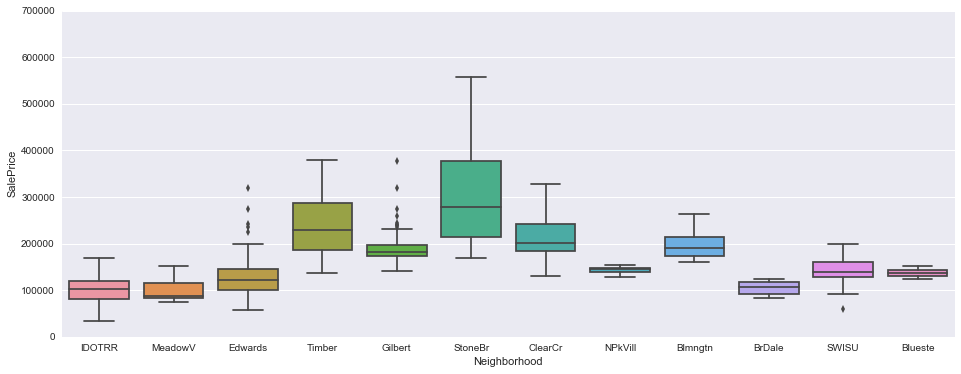

In [231]:
plt.figure(figsize=(16,6))
neigh2 = list(train["Neighborhood"].unique())[13:]
sns.boxplot("Neighborhood", "SalePrice", data=train[train["Neighborhood"].isin(neigh2)])
plt.ylim([0,700000])

Here we can see that the sale price strongly depends on the neighborhood the house is located in, which makes sense.

## 3. Data Preparation <a name="dpw"></a>

In [232]:
# Check for duplicates
idsUnique = train["Id"].nunique()
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are {0} duplicate IDs for {1} total entries".format(idsDupli, idsTotal))

# Drop Id column
train.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


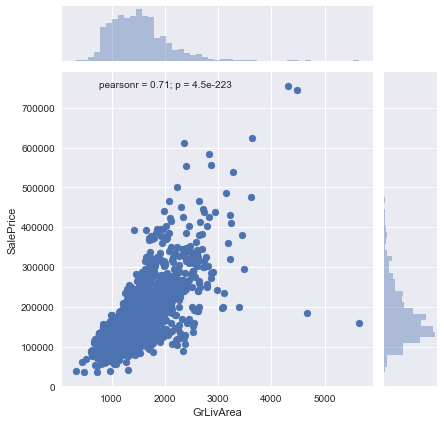

In [233]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
sns.jointplot("GrLivArea", "SalePrice", data=train)

train = train[train.GrLivArea < 4000]

There seems to be two extreme outliers on the bottom right, really large houses that sold for really cheap. More generally, the author of the dataset recommends removing any houses with more than 4000 square feet from the dataset.  
Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

In [234]:
# Log transform the target for official scoring
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train["SalePrice"]

**Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.**

In [235]:
train["BsmtFullBath"].head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

### Dealing with missing values  <a name="missingval"></a>

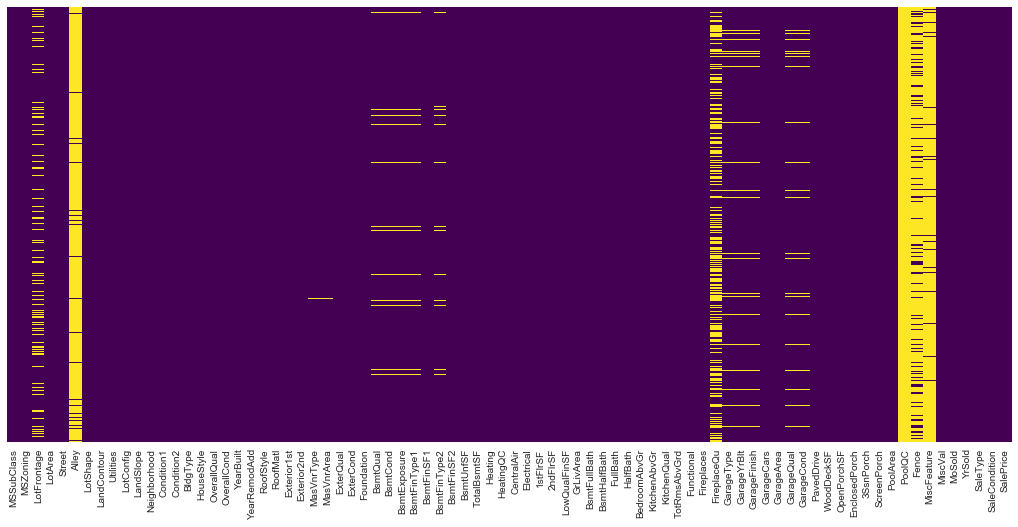

In [236]:
# Heatmap of missing values
plt.figure(figsize=(18,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap="viridis")

In [237]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [238]:
# Handling missing values for features where median/mean or most common value doesn't make sense

# Alley : data description indicates NA means "no alley access"
train["Alley"].fillna("None", inplace=True)

# BedroomAbvGr : NA most likely means 0
train["BedroomAbvGr"].fillna((0), inplace=True)

# BsmtQual, etc. : data description indicates NA for basement features is "no basement"
train["BsmtQual"].fillna(("No"), inplace=True)
train["BsmtCond"].fillna(("No"), inplace=True)
train["BsmtExposure"].fillna(("No"), inplace=True)
train["BsmtFinType1"].fillna(("No"), inplace=True)
train["BsmtFinType2"].fillna(("No"), inplace=True)
train["BsmtFullBath"].fillna((0), inplace=True)
train["BsmtHalfBath"].fillna((0), inplace=True)
train["BsmtUnfSF"].fillna((0), inplace=True)

# Fence : data description says NA means "no fence"
train["Fence"].fillna("No", inplace=True)

# FireplaceQu : data description indicates NA means "no fireplace"
train["FireplaceQu"].fillna("No", inplace=True)
train["Fireplaces"].fillna(0, inplace=True)

# Functional : data description says NA means typical
train["Functional"].fillna("Typ", inplace=True)

# GarageType, etc : data description says NA for garage features is "no garage"
train["GarageType"].fillna("No", inplace=True)
train["GarageFinish"].fillna("No", inplace=True)
train["GarageQual"].fillna("No", inplace=True)
train["GarageCond"].fillna("No", inplace=True)
train["GarageArea"].fillna(0, inplace=True)
train["GarageCars"].fillna(0, inplace=True)

# LotFrontage : NA most likely means no lot frontage
train["LotFrontage"].fillna(0, inplace=True)

# MasVnrType : NA most likely means no veneer
train["MasVnrType"].fillna("None",inplace=True)
train["MasVnrArea"].fillna(0,inplace=True)

# MiscFeature : data description says NA means "no misc feature"
train["MiscFeature"].fillna("No",inplace=True)
train["MiscVal"].fillna(0,inplace=True)

# PoolQC : data description says NA means "no pool"
train["PoolQC"].fillna("No", inplace=True)
train["PoolArea"].fillna(0, inplace=True)

In [239]:
# Others
train["GarageYrBlt"].fillna(round(train["GarageYrBlt"].mean()), inplace=True)

### Feature Engineering <a name="feateng"></a>

In [240]:
# Some numerical features are actually categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [241]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

**Now let's create new features**

In [242]:
# Create new features: Simplifications of existing features

train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

In [243]:
# Create new features: Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [244]:
# Find most important features relative to target
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice            1.000000
OverallQual          0.819240
AllSF                0.817272
AllFlrsSF            0.729421
GrLivArea            0.718844
SimplOverallQual     0.707934
ExterQual            0.680947
GarageCars           0.680408
TotalBath            0.672929
KitchenQual          0.667174
GarageScore          0.656822
GarageArea           0.655212
TotalBsmtSF          0.641553
SimplExterQual       0.635550
SimplGarageScore     0.630802
BsmtQual             0.615225
1stFlrSF             0.613742
SimplKitchenQual     0.610142
OverallGrade         0.604291
SimplBsmtQual        0.593651
FullBath             0.590919
YearBuilt            0.588977
ExterGrade           0.587425
YearRemodAdd         0.568986
FireplaceQu          0.546553
TotRmsAbvGrd         0.533446
SimplOverallGrade    0.526918
SimplKitchenScore    0.523426
FireplaceScore       0.518176
SimplFireplaceQu     0.514921
                       ...   
SimplBsmtCond        0.204396
BedroomAbvGr         0.204117
AllPorchSF

In [245]:
# Differentiate numerical features (minus the target) and categorical features

categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features: {0}".format(len(numerical_features)))
print("Categorical features: {0}".format(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features: 87
Categorical features: 26


In [246]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
import warnings; warnings.simplefilter('ignore')
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

65 skewed numerical features to log transform


### Converting Categorical Features  <a name="dummy"></a>

In [247]:
# Create dummy features for categorical values
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat, drop_first=True)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 1
Remaining NAs for categorical features in train : 0


## 4. Modeling <a name="mfit"></a>

In [248]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 263


In [249]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state=42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 263)
X_test : (437, 263)
y_train : (1019,)
y_test : (437,)


In [250]:
# Standardize numerical features
#scaler = StandardScaler()
#X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
#X_test[numerical_features] = scaler.transform(X_test[numerical_features])
# Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on
# test observations

In [251]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_all(model):
    rmse= np.sqrt(-cross_val_score(model, train, y, scoring = scorer, cv = 10)) 
    return(rmse)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10)) 
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# The minus sign in front of cross_val_score is necessary because if greater_is_better = False in make_scorer,
# the scorer object will sign-flip the outcome of the score_func (in this case it will be negative).

### Linear Regression

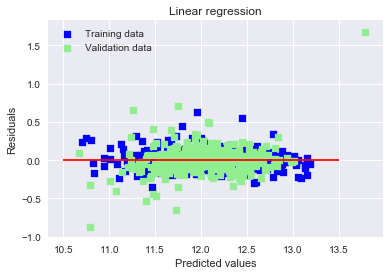

Train RMSE: 0.0847267021993
Test RMSE: 0.162027914319
K-fold CV RMSE : 0.13649150779


In [252]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Training and test errors
print("Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
#print("CV RMSE on Training set :", rmse_cv_train(lr).mean()) # Note that even though this error is obtained using the dataset called "train", it's actually a test error because we are using CV.
#print("CV RMSE on Test set :", rmse_cv_test(lr).mean())
print("K-fold CV RMSE :", rmse_cv_all(lr).mean())

Errors seem randomly distributed and randomly scattered around the centerline which is good.

We can see that the test error is considerably higher than the training error, which is a clear sign of overfitting.

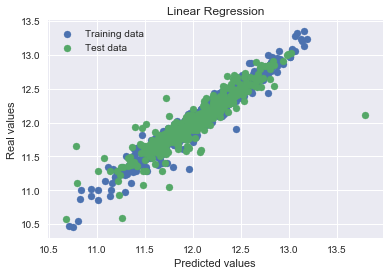

In [253]:
#Plot results
plt.scatter(y_train_pred, y_train, label="Training data")
plt.scatter(y_test_pred, y_test, label="Test data")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.title("Linear Regression")
plt.legend()

In [254]:
lr.score(X_test, y_test) # R^2 on the test data

0.82303734152416419

### Ridge Regression

As an alternative to linear regression, we can fit a model that contains all p predictors using techniques that regularize the coefficient estimates, or equivalently, that shrink the coefficient estimates towards zero.

Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

In [255]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
# Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on
# test observations

In [256]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 27.0


In [257]:
# Training and test errors
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
print("Ridge Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_rdg)))
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_rdg)))
print("Ridge K-fold CV RMSE :", rmse_cv_train(ridge).mean()) # Here we use the train data set to perform CV (the complete dataset is not scaled)

Ridge Train RMSE: 0.0983824686131
Ridge Test RMSE: 0.115459265988
Ridge K-fold CV RMSE : 0.114727693376


We obtain a much lower test RMSE with Ridge Regression. This shows that Ridge Regression is very effective at mitigating overfitting (because it reduces the variance).

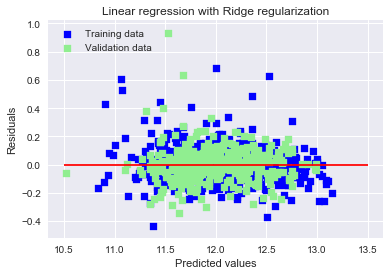

In [258]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

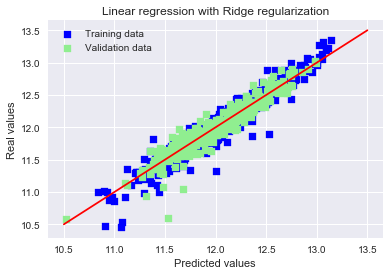

In [259]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Ridge picked 260 features and eliminated the other 3 features


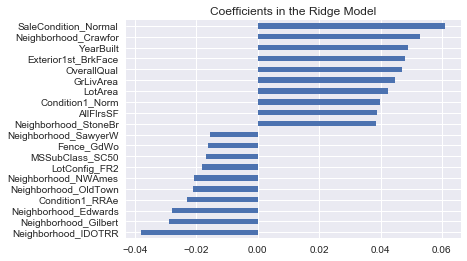

In [260]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

### Lasso regularization

Lasso is an L1 penalized model, it’s an alternative regularization method, where we simply replace the square of the weights by the sum of the absolute value of the weights. 

As with Ridge Regression, the lasso shrinks the coefficient estimates towards zero, however, in the case of the lasso, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero.

In [261]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00063


In [262]:
# Training and test errors
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)
print("Lasso Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_las)))
print("Lasso Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_las)))
print("Lasso K-fold CV RMSE :", rmse_cv_train(lasso).mean()) # Here we use the train data set to perform CV (the complete dataset is not scaled)

Lasso Train RMSE: 0.0988288078088
Lasso Test RMSE: 0.114668278048
Lasso K-fold CV RMSE : 0.112719303405


Train and test errors are similar to the ones obtained with ridge regression.

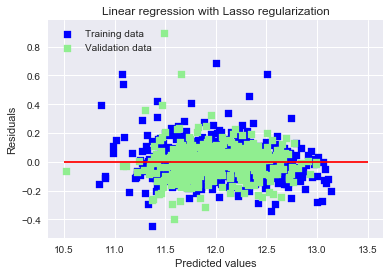

In [263]:
# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

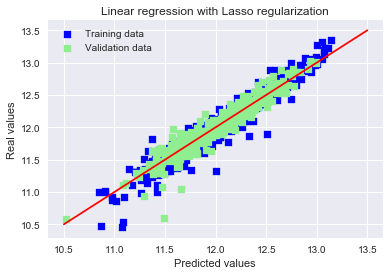

In [264]:
# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Lasso picked 103 features and eliminated the other 160 features


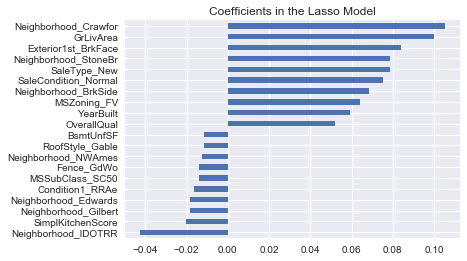

In [265]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

As we can see the Lasso eliminated more than half of the features.

We can clearly see that both Ridge Regression and the lasso mitigate overfitting, thus obtaining better results than linear regression. Lasso does have the added advantage of using less than half of the features, thus being easier to interpret than the model generated from Ridge Regression.

In [266]:
coef_lasso = pd.DataFrame(lasso.coef_, index=train.columns, columns=["Coefficient"])

In [267]:
coef_lasso[coef_lasso["Coefficient"]!=0].sort_values("Coefficient", ascending=False)

,Coefficient
Neighborhood_Crawfor,0.105215
GrLivArea,0.100141
Exterior1st_BrkFace,0.084009
Neighborhood_StoneBr,0.078845
SaleType_New,0.078607
SaleCondition_Normal,0.075111
Neighborhood_BrkSide,0.068288
MSZoning_FV,0.063975
YearBuilt,0.059070
OverallQual,0.051920


As expected, variables like Neighbourhood, GrLivArea, YearBuilt, SaleType and OverallQual (among others) have the biggest impact on our response.